

###SVM on Handwritten Digits for Google Colab


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from itertools import cycle


In [3]:
digits = datasets.load_digits()


In [ ]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Label: {label}")
plt.suptitle("Sample Images from the Digits Dataset")
plt.show()

# Prepare the data for the model
# To use this data, we need to flatten each 8x8 image into a 1D array of 64 features.
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target
class_names = digits.target_names
n_classes = len(class_names)

print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {n_classes}")

In [4]:

# Data Preprocessing and Splitting

# SVMs are sensitive to feature scaling. We'll scale the data to have zero mean and unit variance.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, shuffle=True, random_state=42
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


model = svm.SVC(gamma=0.001, probability=True, random_state=42)
model.fit(X_train, y_train)
print("Model training complete")


Training set size: 1437 samples
Testing set size: 360 samples
Model training complete


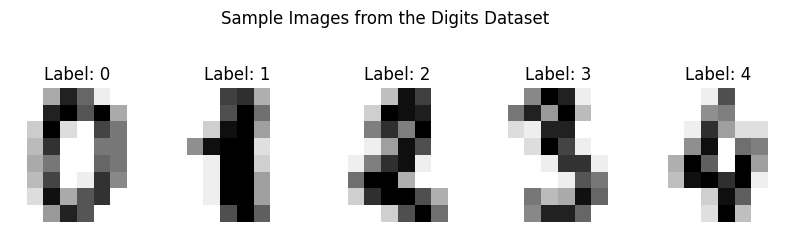

Number of samples: 1797
Number of features: 64
Number of classes: 10

Training set size: 1437 samples
Testing set size: 360 samples

Training the SVM model...
✅ Model training complete!

--- Model Performance ---
🎯 Accuracy: 0.9389 (93.89%)

Displaying Confusion Matrix Heatmap...


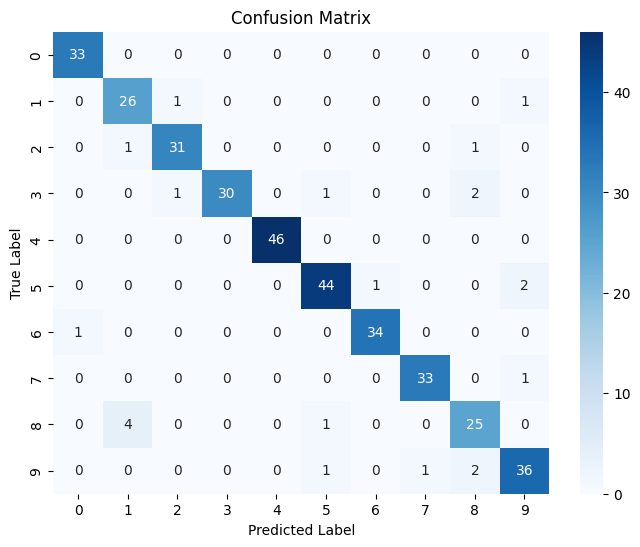


Displaying ROC Curves (One-vs-Rest)...


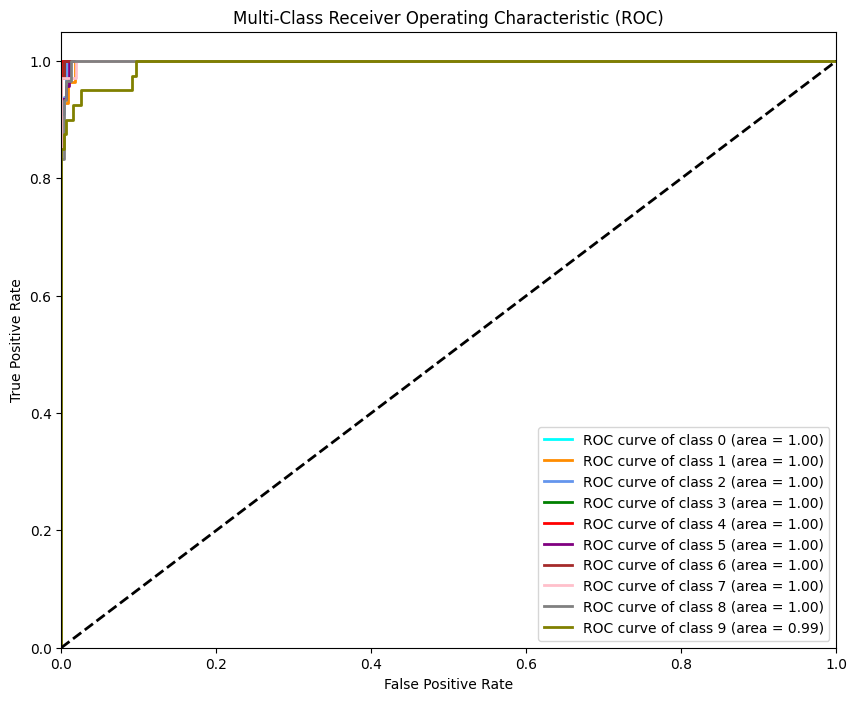


✅ Evaluation complete.


In [1]:



# Model Validation and Evaluation

# Make predictions on the unseen test data
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test) # Get prediction probabilities for ROC curve

# --- 5a. Accuracy Score ---
accuracy = accuracy_score(y_test, y_pred)
print("\n--- Model Performance ---")
print(f"🎯 Accuracy: {accuracy:.4f} ({accuracy:.2%})")

# --- 5b. Confusion Matrix Heatmap ---
print("\nDisplaying Confusion Matrix Heatmap...")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# --- 5c. ROC Curve and AUC for Multi-Class ---
# ROC curves are typically for binary classification. For multi-class,
# we can plot a curve for each class vs. the rest (One-vs-Rest).
print("\nDisplaying ROC Curves (One-vs-Rest)...")

# Binarize the output labels for OvR calculation
y_test_binarized = label_binarize(y_test, classes=range(n_classes))

# Dictionaries to hold ROC curve data
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')


plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

print("\n✅ Evaluation complete.")